# REF

[ControlNet Github](https://github.com/lllyasviel/ControlNet)

[train-your-controlnet](https://huggingface.co/blog/train-your-controlnet)

In [22]:
# !pip install git+https://github.com/huggingface/diffusers.git transformers accelerate xformers==0.0.16 wandb
# !huggingface-cli login
# # !wandb login


# !pip install git+https://github.com/huggingface/diffusers.git 
# !pip3 install torch torchvision torchaudio xformers --index-url https://download.pytorch.org/whl/cu121

# !pip install datasets
# !pip install triton


In [23]:
import diffusers
import importlib
importlib.reload(diffusers)
print(diffusers.__version__)

0.27.0.dev0


In [24]:
import os
if os.path.exists('/projectnb/dl523/students/ychuang2/'):
    HUGGING_FACE_CACHE_DIR = "/projectnb/dl523/students/ychuang2/.cache/huggingface/diffusers"
else:
    HUGGING_FACE_CACHE_DIR = "./cache"
print(f"HUGGING_FACE_CACHE_DIR: {HUGGING_FACE_CACHE_DIR}")


from pathlib import Path
# add ../ to path
# added_path = os.path.abspath(str((Path.cwd().parent.parent / "lib")).__str__())
# if added_path not in os.sys.path:
#     os.sys.path.append(added_path)  

project_main_path = Path.cwd().parent.parent
assert project_main_path.name == 'EC523_Project_G'
added_path = os.path.abspath(project_main_path.__str__())
if added_path not in os.sys.path:
    os.sys.path.append(added_path)  



PHASE3_SCENE_DESCRIPTION_FILE = "./DATASET/PROCESSING_RECORD_PHASE3_SCENE_DESCRIPTION.json"
dataset_path = os.path.abspath(project_main_path) # adjust the path to the dataset


HUGGING_FACE_CACHE_DIR: ./cache


In [25]:

import importlib 
from lib import data as anime_data
import lib.controlnet_self as controlnet_self_file
from lib.controlnet_self import ControlNetModel_SELF as ControlNetModel
from lib.controlnet_self import MultiControlNetModel_SELF 
importlib.reload(anime_data)
importlib.reload(controlnet_self_file)


<module 'lib.controlnet_self' from '/home/tan/BU/EC523/EC523_Project_G/lib/controlnet_self.py'>

In [26]:
# # !wandb login
import os
os.environ["WANDB_API_KEY"] = "84299bb28ce1ba10b3e5e36fafca02ef4eee15c8"
os.environ["WANDB_NOTEBOOK_NAME"] = "test_training_ControlNet.ipynb"

# import wandb
# wandb.login()

In [27]:

MAX_NUM_FIGURE=1

BATCH_SIZE=4
DATSET_SHUFFLE = True


In [28]:

from lib import data as anime_data
importlib.reload(anime_data)

anime_figure_scene_dataset = anime_data.get_dataset(PHASE3_SCENE_DESCRIPTION_FILE, dataset_path=dataset_path, MAX_NUM_FIGURE=MAX_NUM_FIGURE)
# # print(len(anime_figure_scene_dataset))
# print(anime_figure_scene_dataset[0].keys())


# import torch
# from torch.utils.data import  DataLoader

# len_dataset = len(anime_figure_scene_dataset)
# len_train = int(0.9 * len_dataset)
# len_test = len_dataset - len_train
# print(f"len_train: {len_train}, len_test: {len_test}")
# dataset_train = torch.utils.data.Subset(anime_figure_scene_dataset, range(0, len_train))
# dataset_test = torch.utils.data.Subset(anime_figure_scene_dataset, range(len_train, len_dataset))
# print(f"dataset_train: {len(dataset_train)}, dataset_test: {len(dataset_test)}")






# dataloader_train = DataLoader(dataset_train, batch_size=BATCH_SIZE, shuffle=DATSET_SHUFFLE)
# dataloader_test = DataLoader(dataset_test, batch_size=BATCH_SIZE, shuffle=DATSET_SHUFFLE)

# anime_data.display_data(dataloader_train, num_of_batch=1)
# anime_data.display_data(dataloader_test, num_of_batch=1)

# # dataset_concate = torch.utils.data.ConcatDataset([dataset_train, dataset_test])
# # dataloader_concate = DataLoader(dataset_concate, batch_size=5)

# # print(len(dataloader_train), len(dataloader_test), len(dataloader_concate))

# # REF https://pytorch.org/docs/stable/data.html

# # torch.utils.data.ChainDataset(datasets) # on-the-fly concatenation, only for iterable datasets
# # torch.utils.data.ConcatDataset(datasets)

Start Loading Metadata...
series_name: cute
Finish Loading Metadata...


In [29]:

# # batch = next(iter(dataloader_train))
# # print(batch['scene_img'].shape)
# # print(batch['inpainting_img'].shape)
# # print(batch['figure_img_list'].shape)
# # print(len(batch['description']))
# # print(batch['len_figure'].shape)

In [30]:
# !huggingface-cli login
from huggingface_hub import login
login()


In [31]:
# import torch
# print(torch.cuda.is_available())
# # print(torch.cuda)
# !python -m torch.utils.collect_env


## Usage

ref:

- [controlnet huggingface doc](https://huggingface.co/docs/diffusers/api/pipelines/controlnet)

In [32]:
# from diffusers.configuration_utils import ConfigMixin, register_to_config
# from diffusers.loaders import FromOriginalControlNetMixin
# from diffusers.utils import BaseOutput, logging
# from diffusers.models.attention_processor import (
#     ADDED_KV_ATTENTION_PROCESSORS,
#     CROSS_ATTENTION_PROCESSORS,
#     AttentionProcessor,
#     AttnAddedKVProcessor,
#     AttnProcessor,
# )
# from diffusers.models.embeddings import TextImageProjection, TextImageTimeEmbedding, TextTimeEmbedding, TimestepEmbedding, Timesteps
# from diffusers.models.modeling_utils import ModelMixin
# from diffusers.models.unets.unet_2d_blocks import (
#     CrossAttnDownBlock2D,
#     DownBlock2D,
#     UNetMidBlock2D,
#     UNetMidBlock2DCrossAttn,
#     get_down_block,
# )
# from diffusers.models.unets.unet_2d_condition import UNet2DConditionModel



In [33]:

# from dataclasses import dataclass
# from typing import Any, Dict, List, Optional, Tuple, Union

# import torch
# from torch import nn
# from torch.nn import functional as F

# from diffusers import ControlNetModel

# from diffusers.configuration_utils import ConfigMixin, register_to_config
# from diffusers.loaders import FromOriginalControlNetMixin
# from diffusers.utils import BaseOutput, logging
# from diffusers.models.attention_processor import (
#     ADDED_KV_ATTENTION_PROCESSORS,
#     CROSS_ATTENTION_PROCESSORS,
#     AttentionProcessor,
#     AttnAddedKVProcessor,
#     AttnProcessor,
# )
# from diffusers.models.embeddings import TextImageProjection, TextImageTimeEmbedding, TextTimeEmbedding, TimestepEmbedding, Timesteps
# from diffusers.models.modeling_utils import ModelMixin
# from diffusers.models.unets.unet_2d_blocks import (
#     CrossAttnDownBlock2D,
#     DownBlock2D,
#     UNetMidBlock2D,
#     UNetMidBlock2DCrossAttn,
#     get_down_block,
# )
# from diffusers.models.unets.unet_2d_condition import UNet2DConditionModel

In [34]:
# # !pip install opencv-python transformers accelerate
# # from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
# from diffusers import StableDiffusionControlNetPipeline, UniPCMultistepScheduler
# from lib.controlnet_self import ControlNetModel_SELF, MultiControlNetModel_SELF
# from diffusers import  ControlNetModel
# from diffusers.utils import load_image
# import numpy as np
# import torch

# import cv2
# from PIL import Image


# # download an image
# image = load_image(
#     "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
# )
# image = np.array(image)

# # get canny image
# image = cv2.Canny(image, 100, 200)
# image = image[:, :, None]
# image = np.concatenate([image, image, image], axis=2)
# canny_image = Image.fromarray(image)

# # load control net and stable diffusion v1-5
# # controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
# model_controlnet_self = ControlNetModel_SELF.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
# model_multicontrolnet_self = MultiControlNetModel_SELF([model_controlnet_self, model_controlnet_self])
# print(isinstance(model_controlnet_self, ControlNetModel))
# pipe = StableDiffusionControlNetPipeline.from_pretrained(
#     # "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16,
#     # "runwayml/stable-diffusion-v1-5", controlnet=model_controlnet_self, torch_dtype=torch.float16,
#     # "runwayml/stable-diffusion-v1-5", controlnet=[model_controlnet_self, model_controlnet_self], torch_dtype=torch.float16,
#     "runwayml/stable-diffusion-v1-5", controlnet=model_multicontrolnet_self, torch_dtype=torch.float16,
#     safety_checker = None,
#     requires_safety_checker = False,
#     cache_dir = HUGGING_FACE_CACHE_DIR
# )



# # speed up diffusion process with faster scheduler and memory optimization
# pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# # # remove following line if xformers is not installed
# # pipe.enable_xformers_memory_efficient_attention()

# pipe.enable_model_cpu_offload()

# print(canny_image.shape)
# # generate image
# generator = torch.manual_seed(0)
# image = pipe(
#     # "futuristic-looking woman", num_inference_steps=20, generator=generator, image=canny_image
#     "futuristic-looking woman", num_inference_steps=20, generator=generator, image=[canny_image, canny_image]
#     # "futuristic-looking woman", num_inference_steps=20, generator=generator, image=[[canny_image, canny_image]]
# ).images[0] 


In [35]:
# from matplotlib import pyplot as plt
# plt.imshow(canny_image)
# plt.figure()
# plt.imshow(image)


In [36]:
# # # A = 12
# del pipe, image, canny_image

# try:
#     del model_multicontrolnet_self
# except:
#     pass

# try:
#     del model_controlnet_self
# except:
#     pass

## Training


In [37]:
#!/usr/bin/env python
# coding=utf-8
# Copyright 2024 The HuggingFace Inc. team. All rights reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and

import argparse
import contextlib
import gc
import logging
import math
import os
import random
import shutil
from pathlib import Path

# # add ../ to path
# added_path = os.path.abspath(str((Path.cwd().parent.parent / "lib")).__str__())
# if added_path not in os.sys.path:
#     os.sys.path.append(added_path)  

import accelerate
import numpy as np
import torch
import torch.nn.functional as F
import torch.utils.checkpoint
import transformers
from accelerate import Accelerator
from accelerate.logging import get_logger
from accelerate.utils import ProjectConfiguration, set_seed
from datasets import load_dataset
from huggingface_hub import create_repo, upload_folder
from packaging import version
from PIL import Image
from torchvision import transforms
from tqdm.auto import tqdm
from transformers import AutoTokenizer, PretrainedConfig

import diffusers
from lib.controlnet_self import ControlNetModel_SELF as ControlNetModel
from lib.controlnet_self import MultiControlNetModel_SELF
from diffusers import (
    AutoencoderKL,
    # ControlNetModel,
    DDPMScheduler,
    StableDiffusionControlNetPipeline,
    UNet2DConditionModel,
    UniPCMultistepScheduler,
)
from diffusers.optimization import get_scheduler
from diffusers.utils import check_min_version, is_wandb_available
from diffusers.utils.hub_utils import load_or_create_model_card, populate_model_card
from diffusers.utils.import_utils import is_xformers_available
from diffusers.utils.torch_utils import is_compiled_module


In [38]:


if is_wandb_available():
    import wandb

# Will error if the minimal version of diffusers is not installed. Remove at your own risks.
check_min_version("0.27.0.dev0")

logger = get_logger(__name__)



In [39]:

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid


def import_model_class_from_model_name_or_path(pretrained_model_name_or_path: str, revision: str):
    text_encoder_config = PretrainedConfig.from_pretrained(
        pretrained_model_name_or_path,
        subfolder="text_encoder",
        revision=revision,
        cache_dir = HUGGING_FACE_CACHE_DIR,
    )
    model_class = text_encoder_config.architectures[0]

    if model_class == "CLIPTextModel":
        from transformers import CLIPTextModel

        return CLIPTextModel
    elif model_class == "RobertaSeriesModelWithTransformation":
        from diffusers.pipelines.alt_diffusion.modeling_roberta_series import RobertaSeriesModelWithTransformation

        return RobertaSeriesModelWithTransformation
    else:
        raise ValueError(f"{model_class} is not supported.")


def save_model_card(repo_id: str, image_logs=None, base_model=str, repo_folder=None):
    img_str = ""
    if image_logs is not None:
        img_str = "You can find some example images below.\n\n"
        for i, log in enumerate(image_logs):
            images = log["images"]
            validation_prompt = log["validation_prompt"]
            validation_image = log["validation_image"]
            validation_image.save(os.path.join(repo_folder, "image_control.png"))
            img_str += f"prompt: {validation_prompt}\n"
            images = [validation_image] + images
            image_grid(images, 1, len(images)).save(os.path.join(repo_folder, f"images_{i}.png"))
            img_str += f"![images_{i})](./images_{i}.png)\n"

    model_description = f"""
# controlnet-{repo_id}

These are controlnet weights trained on {base_model} with new type of conditioning.
{img_str}
"""
    model_card = load_or_create_model_card(
        repo_id_or_path=repo_id,
        from_training=True,
        license="creativeml-openrail-m",
        base_model=base_model,
        model_description=model_description,
        inference=True,
    )

    tags = [
        "stable-diffusion",
        "stable-diffusion-diffusers",
        "text-to-image",
        "diffusers",
        "controlnet",
        "diffusers-training",
    ]
    model_card = populate_model_card(model_card, tags=tags)

    model_card.save(os.path.join(repo_folder, "README.md"))



In [40]:
# import argparse

# # Create the parser
# parser = argparse.ArgumentParser(description="Example")

# # Add arguments
# parser.add_argument('--myarg', type=int, help='An example argument')

# # Manually create the arguments list
# args = parser.parse_args(['--myarg', '123'])

# # Now args.myarg will be 123, as if you had passed "--myarg 123" on the command line
# print(args.myarg)


In [41]:
def parse_args(input_args=None):
    parser = argparse.ArgumentParser(description="Simple example of a ControlNet training script.")
    parser.add_argument(
        "--pretrained_model_name_or_path",
        type=str,
        default=None,
        required=True,
        help="Path to pretrained model or model identifier from huggingface.co/models.",
    )
    parser.add_argument(
        "--controlnet_model_name_or_path",
        type=str,
        default=None,
        help="Path to pretrained controlnet model or model identifier from huggingface.co/models."
        " If not specified controlnet weights are initialized from unet.",
    )
    parser.add_argument(
        "--revision",
        type=str,
        default=None,
        required=False,
        help="Revision of pretrained model identifier from huggingface.co/models.",
    )
    parser.add_argument(
        "--variant",
        type=str,
        default=None,
        help="Variant of the model files of the pretrained model identifier from huggingface.co/models, 'e.g.' fp16",
    )
    parser.add_argument(
        "--tokenizer_name",
        type=str,
        default=None,
        help="Pretrained tokenizer name or path if not the same as model_name",
    )
    parser.add_argument(
        "--output_dir",
        type=str,
        default="controlnet-model",
        help="The output directory where the model predictions and checkpoints will be written.",
    )
    parser.add_argument(
        "--cache_dir",
        type=str,
        default=None,
        help="The directory where the downloaded models and datasets will be stored.",
    )
    parser.add_argument("--seed", type=int, default=None, help="A seed for reproducible training.")
    parser.add_argument(
        "--resolution",
        type=int,
        default=512,
        help=(
            "The resolution for input images, all the images in the train/validation dataset will be resized to this"
            " resolution"
        ),
    )
    parser.add_argument(
        "--train_batch_size", type=int, default=4, help="Batch size (per device) for the training dataloader."
    )
    parser.add_argument("--num_train_epochs", type=int, default=1)
    parser.add_argument(
        "--max_train_steps",
        type=int,
        default=None,
        help="Total number of training steps to perform.  If provided, overrides num_train_epochs.",
    )
    parser.add_argument(
        "--checkpointing_steps",
        type=int,
        default=500,
        help=(
            "Save a checkpoint of the training state every X updates. Checkpoints can be used for resuming training via `--resume_from_checkpoint`. "
            "In the case that the checkpoint is better than the final trained model, the checkpoint can also be used for inference."
            "Using a checkpoint for inference requires separate loading of the original pipeline and the individual checkpointed model components."
            "See https://huggingface.co/docs/diffusers/main/en/training/dreambooth#performing-inference-using-a-saved-checkpoint for step by step"
            "instructions."
        ),
    )
    parser.add_argument(
        "--checkpoints_total_limit",
        type=int,
        default=None,
        help=("Max number of checkpoints to store."),
    )
    parser.add_argument(
        "--resume_from_checkpoint",
        type=str,
        default=None,
        help=(
            "Whether training should be resumed from a previous checkpoint. Use a path saved by"
            ' `--checkpointing_steps`, or `"latest"` to automatically select the last available checkpoint.'
        ),
    )
    parser.add_argument(
        "--gradient_accumulation_steps",
        type=int,
        default=1,
        help="Number of updates steps to accumulate before performing a backward/update pass.",
    )
    parser.add_argument(
        "--gradient_checkpointing",
        action="store_true",
        help="Whether or not to use gradient checkpointing to save memory at the expense of slower backward pass.",
    )
    parser.add_argument(
        "--learning_rate",
        type=float,
        default=5e-6,
        help="Initial learning rate (after the potential warmup period) to use.",
    )
    parser.add_argument(
        "--scale_lr",
        action="store_true",
        default=False,
        help="Scale the learning rate by the number of GPUs, gradient accumulation steps, and batch size.",
    )
    parser.add_argument(
        "--lr_scheduler",
        type=str,
        default="constant",
        help=(
            'The scheduler type to use. Choose between ["linear", "cosine", "cosine_with_restarts", "polynomial",'
            ' "constant", "constant_with_warmup"]'
        ),
    )
    parser.add_argument(
        "--lr_warmup_steps", type=int, default=500, help="Number of steps for the warmup in the lr scheduler."
    )
    parser.add_argument(
        "--lr_num_cycles",
        type=int,
        default=1,
        help="Number of hard resets of the lr in cosine_with_restarts scheduler.",
    )
    parser.add_argument("--lr_power", type=float, default=1.0, help="Power factor of the polynomial scheduler.")
    parser.add_argument(
        "--use_8bit_adam", action="store_true", help="Whether or not to use 8-bit Adam from bitsandbytes."
    )
    parser.add_argument(
        "--dataloader_num_workers",
        type=int,
        default=0,
        help=(
            "Number of subprocesses to use for data loading. 0 means that the data will be loaded in the main process."
        ),
    )
    parser.add_argument("--adam_beta1", type=float, default=0.9, help="The beta1 parameter for the Adam optimizer.")
    parser.add_argument("--adam_beta2", type=float, default=0.999, help="The beta2 parameter for the Adam optimizer.")
    parser.add_argument("--adam_weight_decay", type=float, default=1e-2, help="Weight decay to use.")
    parser.add_argument("--adam_epsilon", type=float, default=1e-08, help="Epsilon value for the Adam optimizer")
    parser.add_argument("--max_grad_norm", default=1.0, type=float, help="Max gradient norm.")
    parser.add_argument("--push_to_hub", action="store_true", help="Whether or not to push the model to the Hub.")
    parser.add_argument("--hub_token", type=str, default=None, help="The token to use to push to the Model Hub.")
    parser.add_argument(
        "--hub_model_id",
        type=str,
        default=None,
        help="The name of the repository to keep in sync with the local `output_dir`.",
    )
    parser.add_argument(
        "--logging_dir",
        type=str,
        default="logs",
        help=(
            "[TensorBoard](https://www.tensorflow.org/tensorboard) log directory. Will default to"
            " *output_dir/runs/**CURRENT_DATETIME_HOSTNAME***."
        ),
    )
    parser.add_argument(
        "--allow_tf32",
        action="store_true",
        help=(
            "Whether or not to allow TF32 on Ampere GPUs. Can be used to speed up training. For more information, see"
            " https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices"
        ),
    )
    parser.add_argument(
        "--report_to",
        type=str,
        default="tensorboard",
        help=(
            'The integration to report the results and logs to. Supported platforms are `"tensorboard"`'
            ' (default), `"wandb"` and `"comet_ml"`. Use `"all"` to report to all integrations.'
        ),
    )
    parser.add_argument(
        "--mixed_precision",
        type=str,
        default=None,
        choices=["no", "fp16", "bf16"],
        help=(
            "Whether to use mixed precision. Choose between fp16 and bf16 (bfloat16). Bf16 requires PyTorch >="
            " 1.10.and an Nvidia Ampere GPU.  Default to the value of accelerate config of the current system or the"
            " flag passed with the `accelerate.launch` command. Use this argument to override the accelerate config."
        ),
    )
    parser.add_argument(
        "--enable_xformers_memory_efficient_attention", action="store_true", help="Whether or not to use xformers."
    )
    parser.add_argument(
        "--set_grads_to_none",
        action="store_true",
        help=(
            "Save more memory by using setting grads to None instead of zero. Be aware, that this changes certain"
            " behaviors, so disable this argument if it causes any problems. More info:"
            " https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html"
        ),
    )
    parser.add_argument(
        "--dataset_name",
        type=str,
        default=None,
        help=(
            "The name of the Dataset (from the HuggingFace hub) to train on (could be your own, possibly private,"
            " dataset). It can also be a path pointing to a local copy of a dataset in your filesystem,"
            " or to a folder containing files that ð¤ Datasets can understand."
        ),
    )
    parser.add_argument(
        "--dataset_config_name",
        type=str,
        default=None,
        help="The config of the Dataset, leave as None if there's only one config.",
    )
    parser.add_argument(
        "--train_data_dir",
        type=str,
        default=None,
        help=(
            "A folder containing the training data. Folder contents must follow the structure described in"
            " https://huggingface.co/docs/datasets/image_dataset#imagefolder. In particular, a `metadata.jsonl` file"
            " must exist to provide the captions for the images. Ignored if `dataset_name` is specified."
        ),
    )
    parser.add_argument(
        "--image_column", type=str, default="image", help="The column of the dataset containing the target image."
    )
    parser.add_argument(
        "--conditioning_image_column",
        type=str,
        default="conditioning_image",
        help="The column of the dataset containing the controlnet conditioning image.",
    )
    parser.add_argument(
        "--caption_column",
        type=str,
        default="text",
        help="The column of the dataset containing a caption or a list of captions.",
    )
    parser.add_argument(
        "--max_train_samples",
        type=int,
        default=None,
        help=(
            "For debugging purposes or quicker training, truncate the number of training examples to this "
            "value if set."
        ),
    )
    parser.add_argument(
        "--proportion_empty_prompts",
        type=float,
        default=0,
        help="Proportion of image prompts to be replaced with empty strings. Defaults to 0 (no prompt replacement).",
    )
    parser.add_argument(
        "--validation_prompt",
        type=str,
        default=None,
        nargs="+",
        help=(
            "A set of prompts evaluated every `--validation_steps` and logged to `--report_to`."
            " Provide either a matching number of `--validation_image`s, a single `--validation_image`"
            " to be used with all prompts, or a single prompt that will be used with all `--validation_image`s."
        ),
    )
    parser.add_argument(
        "--validation_image",
        type=str,
        default=None,
        nargs="+",
        help=(
            "A set of paths to the controlnet conditioning image be evaluated every `--validation_steps`"
            " and logged to `--report_to`. Provide either a matching number of `--validation_prompt`s, a"
            " a single `--validation_prompt` to be used with all `--validation_image`s, or a single"
            " `--validation_image` that will be used with all `--validation_prompt`s."
        ),
    )
    parser.add_argument(
        "--num_validation_images",
        type=int,
        default=4,
        help="Number of images to be generated for each `--validation_image`, `--validation_prompt` pair",
    )
    parser.add_argument(
        "--validation_steps",
        type=int,
        default=100,
        help=(
            "Run validation every X steps. Validation consists of running the prompt"
            " `args.validation_prompt` multiple times: `args.num_validation_images`"
            " and logging the images."
        ),
    )
    parser.add_argument(
        "--tracker_project_name",
        type=str,
        default="train_controlnet",
        help=(
            "The `project_name` argument passed to Accelerator.init_trackers for"
            " more information see https://huggingface.co/docs/accelerate/v0.17.0/en/package_reference/accelerator#accelerate.Accelerator"
        ),
    )

    if input_args is not None:
        args = parser.parse_args(input_args)
    else:
        args = parser.parse_args()

    if args.dataset_name is None and args.train_data_dir is None:
        raise ValueError("Specify either `--dataset_name` or `--train_data_dir`")

    if args.dataset_name is not None and args.train_data_dir is not None:
        raise ValueError("Specify only one of `--dataset_name` or `--train_data_dir`")

    if args.proportion_empty_prompts < 0 or args.proportion_empty_prompts > 1:
        raise ValueError("`--proportion_empty_prompts` must be in the range [0, 1].")

    if args.validation_prompt is not None and args.validation_image is None:
        raise ValueError("`--validation_image` must be set if `--validation_prompt` is set")

    if args.validation_prompt is None and args.validation_image is not None:
        raise ValueError("`--validation_prompt` must be set if `--validation_image` is set")

    if (
        args.validation_image is not None
        and args.validation_prompt is not None
        and len(args.validation_image) != 1
        and len(args.validation_prompt) != 1
        and len(args.validation_image) != len(args.validation_prompt)
    ):
        raise ValueError(
            "Must provide either 1 `--validation_image`, 1 `--validation_prompt`,"
            " or the same number of `--validation_prompt`s and `--validation_image`s"
        )

    if args.resolution % 8 != 0:
        raise ValueError(
            "`--resolution` must be divisible by 8 for consistently sized encoded images between the VAE and the controlnet encoder."
        )

    return args


In [42]:
# !accelerate launch train_controlnet.py \
#  --pretrained_model_name_or_path="stabilityai/stable-diffusion-2-1-base" \
#  --output_dir="model_out" \
#  --dataset_name=multimodalart/facesyntheticsspigacaptioned \
#  --conditioning_image_column=spiga_seg \
#  --image_column=image \
#  --caption_column=image_caption \
#  --resolution=512 \
#  --learning_rate=1e-5 \
#  --validation_image "./face_landmarks1.jpeg" "./face_landmarks2.jpeg" "./face_landmarks3.jpeg" \
#  --validation_prompt "High-quality close-up dslr photo of man wearing a hat with trees in the background" "Girl smiling, professional dslr photograph, dark background, studio lights, high quality" "Portrait of a clown face, oil on canvas, bittersweet expression" \
#  --train_batch_size=4 \
#  --num_train_epochs=3 \
#  --tracker_project_name="controlnet" \
#  --enable_xformers_memory_efficient_attention \
#  --checkpointing_steps=5000 \
#  --validation_steps=5000 \
#  --report_to wandb \
#  --push_to_hub


args_list = ["--pretrained_model_name_or_path", "stabilityai/stable-diffusion-2-1-base", 
        "--output_dir", "model_out", 
        "--dataset_name","multimodalart/facesyntheticsspigacaptioned", 
        "--conditioning_image_column", "spiga_seg", \
        "--image_column", "image", \
        "--caption_column","image_caption", \
        "--resolution=512", \
        "--learning_rate", "1e-5", \
        # "--validation_image", '"./face_landmarks1.png " "./face_landmarks2.png" "./face_landmarks3.png"', \
        # "--validation_prompt", '"High-quality close-up dslr photo of man wearing a hat with trees in the background" "Girl smiling, professional dslr photograph, dark background, studio lights, high quality" "Portrait of a clown face, oil on canvas, bittersweet expression"', \
        "--train_batch_size","4", \
        "--num_train_epochs","3", \
        "--tracker_project_name", "controlnet", \
        # "--enable_xformers_memory_efficient_attention", \
        # "--checkpointing_steps", "5000", \
        # "--validation_steps", "5000", \
        "--checkpointing_steps", "400", \
        "--validation_steps", "400", \
        "--report_to", "wandb", \
        "--push_to_hub",
        "--cache_dir", "./cache", \
        
        "--num_validation_images", "20", \
        ]
args = parse_args(args_list)



### Logging + Accelerator + repo_id

In [43]:
def get_logger_and_accelerator(args):
    # Set up logging
    if args.report_to == "wandb" and args.hub_token is not None:
        raise ValueError(
            "You cannot use both --report_to=wandb and --hub_token due to a security risk of exposing your token."
            " Please use `huggingface-cli login` to authenticate with the Hub."
        )

    logging_dir = Path(args.output_dir, args.logging_dir)

    accelerator_project_config = ProjectConfiguration(project_dir=args.output_dir, logging_dir=logging_dir)

    accelerator = Accelerator(
        gradient_accumulation_steps=args.gradient_accumulation_steps,
        mixed_precision=args.mixed_precision,
        log_with=args.report_to,
        project_config=accelerator_project_config,
    )

    # Make one log on every process with the configuration for debugging.
    logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s - %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO,
    )
    logger.info(accelerator.state, main_process_only=False)
    if accelerator.is_local_main_process:
        transformers.utils.logging.set_verbosity_warning()
        diffusers.utils.logging.set_verbosity_info()
    else:
        transformers.utils.logging.set_verbosity_error()
        diffusers.utils.logging.set_verbosity_error()

    # If passed along, set the training seed now.
    if args.seed is not None:
        set_seed(args.seed)

    # Handle the repository creation
    repo_id = None
    if accelerator.is_main_process:
        if args.output_dir is not None:
            os.makedirs(args.output_dir, exist_ok=True)

        if args.push_to_hub:
            repo_id = create_repo(
                repo_id=args.hub_model_id or Path(args.output_dir).name, exist_ok=True, token=args.hub_token
            ).repo_id

    return accelerator, logger, repo_id

In [44]:
accelerator, logger, repo_id = get_logger_and_accelerator(args)

03/19/2024 22:49:30 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no



### load + setting models

In [45]:
# Taken from [Sayak Paul's Diffusers PR #6511](https://github.com/huggingface/diffusers/pull/6511/files)
def unwrap_model(model, accelerator):
    model = accelerator.unwrap_model(model)
    model = model._orig_mod if is_compiled_module(model) else model
    return model

In [46]:
def get_tokenizer(args, accelerator):
    # Load the tokenizer
    if args.tokenizer_name:
        tokenizer = AutoTokenizer.from_pretrained(args.tokenizer_name, revision=args.revision, use_fast=False)
    elif args.pretrained_model_name_or_path:
        tokenizer = AutoTokenizer.from_pretrained(
            args.pretrained_model_name_or_path,
            subfolder="tokenizer",
            revision=args.revision,
            use_fast=False,
        )

    # # import correct text encoder class
    # text_encoder_cls = import_model_class_from_model_name_or_path(args.pretrained_model_name_or_path, args.revision)

    # text_encoder = text_encoder_cls.from_pretrained(
    #     args.pretrained_model_name_or_path, subfolder="text_encoder", revision=args.revision, variant=args.variant,
    #     cache_dir = HUGGING_FACE_CACHE_DIR,
    # )
    # # text_encoder = text_encoder.to(accelerator.device)
    # # text_encoder = accelerator.prepare(text_encoder)

    return tokenizer

In [47]:
def load_and_setting_models(args, accelerator):
    

    # import correct text encoder class
    text_encoder_cls = import_model_class_from_model_name_or_path(args.pretrained_model_name_or_path, args.revision)

    # Load scheduler and models
    noise_scheduler = DDPMScheduler.from_pretrained(args.pretrained_model_name_or_path, subfolder="scheduler")
    text_encoder = text_encoder_cls.from_pretrained(
        args.pretrained_model_name_or_path, subfolder="text_encoder", revision=args.revision, variant=args.variant,
        cache_dir = HUGGING_FACE_CACHE_DIR,
    )
    vae = AutoencoderKL.from_pretrained(
        args.pretrained_model_name_or_path, subfolder="vae", revision=args.revision, variant=args.variant,
        cache_dir = HUGGING_FACE_CACHE_DIR,
    )


    # return tokenizer, noise_scheduler, text_encoder, vae, unet, controlnet
    # return noise_scheduler, text_encoder, vae, unet, controlnet
    return noise_scheduler, text_encoder, vae


In [48]:
def get_controlnet_unet(args, accelerator):
    
    unet = UNet2DConditionModel.from_pretrained(
        args.pretrained_model_name_or_path, subfolder="unet", revision=args.revision, variant=args.variant,
        cache_dir = HUGGING_FACE_CACHE_DIR,
    )
    
    if args.controlnet_model_name_or_path:
        logger.info("Loading existing controlnet weights")
        controlnet = ControlNetModel.from_pretrained(args.controlnet_model_name_or_path,
                                                        cache_dir = HUGGING_FACE_CACHE_DIR,
                                                        )
    else:
        logger.info("Initializing controlnet weights from unet")
        controlnet = ControlNetModel.from_unet(unet)


    # `accelerate` 0.16.0 will have better support for customized saving
    if version.parse(accelerate.__version__) >= version.parse("0.16.0"):
        # create custom saving & loading hooks so that `accelerator.save_state(...)` serializes in a nice format
        def save_model_hook(models, weights, output_dir):
            if accelerator.is_main_process:
                i = len(weights) - 1

                while len(weights) > 0:
                    weights.pop()
                    model = models[i]

                    sub_dir = "controlnet"
                    model.save_pretrained(os.path.join(output_dir, sub_dir))

                    i -= 1

        def load_model_hook(models, input_dir):
            while len(models) > 0:
                # pop models so that they are not loaded again
                model = models.pop()

                # load diffusers style into model
                load_model = ControlNetModel.from_pretrained(input_dir, subfolder="controlnet")
                model.register_to_config(**load_model.config)

                model.load_state_dict(load_model.state_dict())
                del load_model

        accelerator.register_save_state_pre_hook(save_model_hook)
        accelerator.register_load_state_pre_hook(load_model_hook)


    if args.enable_xformers_memory_efficient_attention:
        if is_xformers_available():
            import xformers

            xformers_version = version.parse(xformers.__version__)
            if xformers_version == version.parse("0.0.16"):
                logger.warn(
                    "xFormers 0.0.16 cannot be used for training in some GPUs. If you observe problems during training, please update xFormers to at least 0.0.17. See https://huggingface.co/docs/diffusers/main/en/optimization/xformers for more details."
                )
            unet.enable_xformers_memory_efficient_attention()
            controlnet.enable_xformers_memory_efficient_attention()
        else:
            raise ValueError("xformers is not available. Make sure it is installed correctly")

    if args.gradient_checkpointing:
        controlnet.enable_gradient_checkpointing()

    # Check that all trainable models are in full precision
    low_precision_error_string = (
        " Please make sure to always have all model weights in full float32 precision when starting training - even if"
        " doing mixed precision training, copy of the weights should still be float32."
    )

    if unwrap_model(controlnet, accelerator).dtype != torch.float32:
        raise ValueError(
            f"Controlnet loaded as datatype {unwrap_model(controlnet, accelerator).dtype}. {low_precision_error_string}"
        )

    # Enable TF32 for faster training on Ampere GPUs,
    # cf https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices
    if args.allow_tf32:
        torch.backends.cuda.matmul.allow_tf32 = True

    return controlnet, unet

In [49]:
tokenizer = get_tokenizer(args, accelerator)
controlnet, unet = get_controlnet_unet(args, accelerator)

# to multi-controlnet, copy the same onw twice , 1 -> 2x
controlnet = MultiControlNetModel_SELF([controlnet, controlnet])


{'projection_class_embeddings_input_dim', 'dropout', 'num_attention_heads', 'addition_embed_type_num_heads', 'addition_time_embed_dim', 'addition_embed_type', 'time_embedding_act_fn', 'mid_block_type', 'conv_out_kernel', 'class_embed_type', 'class_embeddings_concat', 'conv_in_kernel', 'encoder_hid_dim', 'time_embedding_type', 'transformer_layers_per_block', 'attention_type', 'cross_attention_norm', 'resnet_out_scale_factor', 'resnet_skip_time_act', 'time_cond_proj_dim', 'mid_block_only_cross_attention', 'reverse_transformer_layers_per_block', 'timestep_post_act', 'upcast_attention', 'resnet_time_scale_shift', 'encoder_hid_dim_type', 'time_embedding_dim'} was not found in config. Values will be initialized to default values.
03/19/2024 22:49:31 - INFO - __main__ - Initializing controlnet weights from unet


In [50]:
noise_scheduler, text_encoder, vae = load_and_setting_models(args, accelerator)

You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
{'clip_sample_range', 'sample_max_value', 'dynamic_thresholding_ratio', 'rescale_betas_zero_snr', 'variance_type', 'thresholding', 'timestep_spacing'} was not found in config. Values will be initialized to default values.
{'scaling_factor', 'latents_mean', 'latents_std', 'force_upcast'} was not found in config. Values will be initialized to default values.


In [51]:
vae.requires_grad_(False)
unet.requires_grad_(False)
text_encoder.requires_grad_(False)
controlnet.train()


MultiControlNetModel_SELF(
  (nets): ModuleList(
    (0-1): 2 x ControlNetModel_SELF(
      (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (time_proj): Timesteps()
      (time_embedding): TimestepEmbedding(
        (linear_1): Linear(in_features=320, out_features=1280, bias=True)
        (act): SiLU()
        (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
      )
      (controlnet_cond_embedding): ControlNetConditioningEmbedding(
        (conv_in): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (blocks): ModuleList(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (3): Conv2d(32, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (4): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding

### get dataset and dataloader

In [52]:
# def preprocess_dataset(args, dataset, tokenizer, accelerator):
#     # def tokenize_captions(dataset, is_train=True, caption_column="description_list"):
#     def tokenize_captions(sentences, is_train=True):
#         captions = []
#         # for caption in dataset.get_data_by_key(caption_column):
#         for caption in sentences:
#             if random.random() < args.proportion_empty_prompts:
#                 captions.append("")
#             elif isinstance(caption, str):
#                 captions.append(caption)
#             elif isinstance(caption, (list, np.ndarray)):
#                 # take a random caption if there are multiple
#                 captions.append(random.choice(caption) if is_train else caption[0])
#             else:
#                 # raise ValueError(
#                 #     f"Caption column `{caption_column}` should contain either strings or lists of strings."
#                 # )
#                 raise ValueError(
#                     f"sentences should contain either strings or lists of strings."
#                 )
#         inputs = tokenizer(
#             captions, max_length=tokenizer.model_max_length, padding="max_length", truncation=True, return_tensors="pt"
#         )
#         return inputs.input_ids

#     image_transforms = transforms.Compose(
#         [
#             transforms.Resize(args.resolution, interpolation=transforms.InterpolationMode.BILINEAR),
#             transforms.CenterCrop(args.resolution),
#             transforms.ToTensor(),
#             transforms.Normalize([0.5], [0.5]),
#         ]
#     )

#     conditioning_image_transforms = transforms.Compose(
#         [
#             transforms.Resize(args.resolution, interpolation=transforms.InterpolationMode.BILINEAR),
#             transforms.CenterCrop(args.resolution),
#             transforms.ToTensor(),
#         ]
#     )

#     # def preprocess_text_embedding_and_image(dataset, scene_image_column="scene_img", inpainting_image_column="inpainting_img", conditioning_image_column="figure_img_list"):
#     def preprocess_text_embedding_and_image(dataset):
#         # # images = [image.convert("RGB") for image in dataset[image_column]]
#         # scene_images = dataset.get_data_by_key(scene_image_column)
#         # # scene_images = [image_transforms(image) for image in scene_images]
#         # # images = [image_transforms(image) for image in images]

#         # conditioning_images = dataset.get_data_by_key(inpainting_image_column)
#         # # conditioning_images = [image_transforms(image) for image in conditioning_images]

#         # # conditioning_images = [image.convert("RGB") for image in dataset[conditioning_image_column]]
#         # conditioning_images_02 = dataset.get_data_by_key(conditioning_image_column)
#         # # conditioning_images_02 = [image_transforms(image) for image in conditioning_images_02]

#         # dataset["pixel_values"] = scene_images
#         # dataset["conditioning_pixel_values_01"] = conditioning_images
#         # dataset["conditioning_pixel_values_02"] = conditioning_images_02
#         # dataset["input_ids"] = tokenize_captions(dataset)
#         sents = [dataset[i]["description"] for i in range(len(dataset))]
#         input_ids = tokenize_captions(sents)

#         # dataset.update("pixel_values", scene_images)
#         # dataset.update("conditioning_pixel_values_01", conditioning_images)
#         # dataset.update("conditioning_pixel_values_02", conditioning_images_02)
#         dataset.update("input_ids", tokenize_captions(dataset))

#         return dataset

#     with accelerator.main_process_first():
#         # if args.max_train_samples is not None:
#         #     dataset["train"] = dataset["train"].shuffle(seed=args.seed).select(range(args.max_train_samples))
#         # # Set the training transforms
#         # # dataset = dataset["train"].with_transform(preprocess_text_embedding_and_image)
#         dataset = preprocess_text_embedding_and_image(dataset)

#     return dataset



In [53]:

def collate_fn(examples):
    # pixel_values = torch.stack([example["pixel_values"] for example in examples])
    pixel_values = torch.stack([torch.tensor(example["scene_img"]) for example in examples])
    pixel_values = pixel_values.to(memory_format=torch.contiguous_format).float()

    conditioning_pixel_values = torch.stack([torch.tensor(example["inpainting_img"]) for example in examples])
    conditioning_pixel_values = conditioning_pixel_values.to(memory_format=torch.contiguous_format).float()

    figures = []
    for example in examples:
        img = example["figure_img_list"]
        # print(img.shape)    
        if img.ndim == 4:
            figures.append(torch.tensor(img))
        elif img.ndim == 5:
            figures.append(torch.tensor(img[:,0,:,:,:]))
        else:
            raise ValueError("figure_img_list should have 4 or 5 dimensions")        
    # conditioning_pixel_values_02 = torch.stack([torch.tensor(example["figure_img_list"][:,0,:,:,:]) for example in examples])
    conditioning_pixel_values_02 = torch.cat(figures, dim=0)
    conditioning_pixel_values_02 = conditioning_pixel_values_02.to(memory_format=torch.contiguous_format).float()


    captions = [example["description"] for example in examples]
    inputs = tokenizer(
        captions, max_length=tokenizer.model_max_length, padding="max_length", truncation=True, return_tensors="pt"
    )
    # input_ids = torch.stack([example["input_ids"] for example in examples])
    input_ids = inputs.input_ids

    return {
        "pixel_values": pixel_values,
        "conditioning_pixel_values": conditioning_pixel_values,
        "conditioning_pixel_values_02": conditioning_pixel_values_02,
        "input_ids": input_ids,
        "captions": captions
    }


In [54]:
def get_dataloader(args, tokenizer, accelerator, dataset, split_ratio=0.9):    
    # dataset_text_embedded = preprocess_dataset(args, dataset, tokenizer, accelerator)
        
    len_dataset = len(anime_figure_scene_dataset)
    len_train = int(split_ratio * len_dataset)
    len_eval = len_dataset - len_train



    dataset_train = torch.utils.data.Subset(anime_figure_scene_dataset, range(0, len_train))
    dataset_eval = torch.utils.data.Subset(anime_figure_scene_dataset, range(len_train, len_dataset))
    
    train_dataloader = torch.utils.data.DataLoader(
        dataset_train,
        shuffle=True,
        collate_fn=collate_fn,
        batch_size=args.train_batch_size,
        num_workers=args.dataloader_num_workers,
    )

    eval_dataloader = torch.utils.data.DataLoader(
        dataset_eval,
        shuffle=False,
        collate_fn=collate_fn,
        batch_size=args.train_batch_size,
        num_workers=args.dataloader_num_workers,
    )

    return train_dataloader, eval_dataloader

In [55]:
# dataset_text_embedded = preprocess_dataset(args, anime_figure_scene_dataset, tokenizer, accelerator)


In [56]:
# import inspect
# A = inspect.getsourcefile(torch.utils.data.Dataset)
# print(A)
# anime_figure_scene_dataset.update("a", torch.zeros((2086,1)))
# print(anime_figure_scene_dataset[0].keys())
# anime_figure_scene_dataset[0]['figure_img_list'].shape

In [57]:
train_dataloader, eval_dataloader = get_dataloader(args, tokenizer, accelerator, anime_figure_scene_dataset)

In [58]:
batch = next(iter(train_dataloader))
print(batch.keys())
print(batch["pixel_values"].shape)
print(batch["conditioning_pixel_values"].shape)
print(batch["conditioning_pixel_values_02"].shape)
print(batch["input_ids"].shape)
print(len(batch["captions"]))

# # dict_keys(['pixel_values', 'conditioning_pixel_values', 'conditioning_pixel_values_02', 'input_ids'])
# # torch.Size([4, 256, 256, 3])
# # torch.Size([4, 256, 256, 3])
# # torch.Size([4, 1, 3, 256, 256])
# torch.Size([4, 77])

dict_keys(['pixel_values', 'conditioning_pixel_values', 'conditioning_pixel_values_02', 'input_ids', 'captions'])
torch.Size([4, 3, 256, 256])
torch.Size([4, 3, 256, 256])
torch.Size([4, 3, 256, 256])
torch.Size([4, 77])
4


### set overrode_max_train_steps

In [59]:
# Scheduler and math around the number of training steps.
overrode_max_train_steps = False
num_update_steps_per_epoch = math.ceil(len(train_dataloader) / args.gradient_accumulation_steps)
if args.max_train_steps is None:
    args.max_train_steps = args.num_train_epochs * num_update_steps_per_epoch
    overrode_max_train_steps = True


### set lr + get optimizer + lr_scheduler

In [60]:
def get_optimizer(args, controlnet):    
    if args.scale_lr:
        args.learning_rate = (
            args.learning_rate * args.gradient_accumulation_steps * args.train_batch_size * accelerator.num_processes
        )

    # Use 8-bit Adam for lower memory usage or to fine-tune the model in 16GB GPUs
    if args.use_8bit_adam:
        try:
            import bitsandbytes as bnb
        except ImportError:
            raise ImportError(
                "To use 8-bit Adam, please install the bitsandbytes library: `pip install bitsandbytes`."
            )

        optimizer_class = bnb.optim.AdamW8bit
    else:
        optimizer_class = torch.optim.AdamW

    # Optimizer creation
    params_to_optimize = controlnet.parameters()
    optimizer = optimizer_class(
        params_to_optimize,
        lr=args.learning_rate,
        betas=(args.adam_beta1, args.adam_beta2),
        weight_decay=args.adam_weight_decay,
        eps=args.adam_epsilon,
    )

    return optimizer

In [61]:
def get_lr_scheduler(args, optimizer):
    lr_scheduler = get_scheduler(
        args.lr_scheduler,
        optimizer=optimizer,
        num_warmup_steps=args.lr_warmup_steps * accelerator.num_processes,
        num_training_steps=args.max_train_steps * accelerator.num_processes,
        num_cycles=args.lr_num_cycles,
        power=args.lr_power,
    )
    
    return lr_scheduler


In [62]:
optimizer = get_optimizer(args, controlnet)
lr_scheduler = get_lr_scheduler(args, optimizer)

### wrap with accelerator

In [63]:
def wrap_with_accelerator(args, train_dataloader, eval_dataloader, controlnet, optimizer, lr_scheduler,
                          vae, unet, text_encoder, accelerator, overrode_max_train_steps=False):
    

    # Prepare everything with our `accelerator`.
    controlnet, optimizer, train_dataloader, eval_dataloader, lr_scheduler = accelerator.prepare(
        controlnet, optimizer, train_dataloader, eval_dataloader, lr_scheduler
    )

    # For mixed precision training we cast the text_encoder and vae weights to half-precision
    # as these models are only used for inference, keeping weights in full precision is not required.
    weight_dtype = torch.float32
    if accelerator.mixed_precision == "fp16":
        weight_dtype = torch.float16
    elif accelerator.mixed_precision == "bf16":
        weight_dtype = torch.bfloat16

    # Move vae, unet and text_encoder to device and cast to weight_dtype
    vae.to(accelerator.device, dtype=weight_dtype)
    unet.to(accelerator.device, dtype=weight_dtype)
    text_encoder.to(accelerator.device, dtype=weight_dtype)

    # We need to recalculate our total training steps as the size of the training dataloader may have changed.
    num_update_steps_per_epoch = math.ceil(len(train_dataloader) / args.gradient_accumulation_steps)
    if overrode_max_train_steps:
        args.max_train_steps = args.num_train_epochs * num_update_steps_per_epoch
    # Afterwards we recalculate our number of training epochs
    args.num_train_epochs = math.ceil(args.max_train_steps / num_update_steps_per_epoch)

    # We need to initialize the trackers we use, and also store our configuration.
    # The trackers initializes automatically on the main process.
    if accelerator.is_main_process:
        tracker_config = dict(vars(args))

        # tensorboard cannot handle list types for config
        tracker_config.pop("validation_prompt")
        tracker_config.pop("validation_image")

        accelerator.init_trackers(args.tracker_project_name, config=tracker_config)

    return controlnet, optimizer, lr_scheduler, train_dataloader, eval_dataloader, vae, unet, text_encoder, \
        weight_dtype, num_update_steps_per_epoch

In [64]:
coontrolnet, optimizer, lr_scheduler, train_dataloader, eval_dataloader, vae, unet, text_encoder, \
weight_dtype, num_update_steps_per_epoch = \
    wrap_with_accelerator(args, train_dataloader, eval_dataloader, controlnet, optimizer, lr_scheduler, \
                            vae, unet, text_encoder, accelerator, overrode_max_train_steps=overrode_max_train_steps)

wandb: Currently logged in as: ychuang2. Use `wandb login --relogin` to force relogin


### taining loop

In [94]:


def log_validation(
    eval_dataloader, vae, text_encoder, tokenizer, unet, controlnet, \
    args, accelerator, weight_dtype, step, is_final_validation=False
):
    controlnet.eval()
    vae.eval()
    text_encoder.eval()
    unet.eval()

    logger.info("Running validation... ")

    if not is_final_validation:
        controlnet = accelerator.unwrap_model(controlnet)
    else:
        controlnet = ControlNetModel.from_pretrained(
            args.output_dir, torch_dtype=weight_dtype,
            cache_dir = HUGGING_FACE_CACHE_DIR,
            )

    assert isinstance(controlnet, MultiControlNetModel_SELF)
    pipeline = StableDiffusionControlNetPipeline.from_pretrained(
        args.pretrained_model_name_or_path,
        vae=vae,
        text_encoder=text_encoder,
        tokenizer=tokenizer,
        unet=unet,
        controlnet=controlnet,
        # controlnet=[controlnet, controlnet],
        safety_checker=None,
        revision=args.revision,
        variant=args.variant,
        torch_dtype=weight_dtype,
        cache_dir = HUGGING_FACE_CACHE_DIR,
    )
    pipeline.scheduler = UniPCMultistepScheduler.from_config(pipeline.scheduler.config)
    pipeline = pipeline.to(accelerator.device)
    pipeline.set_progress_bar_config(disable=True)

    if args.enable_xformers_memory_efficient_attention:
        pipeline.enable_xformers_memory_efficient_attention()

    if args.seed is None:
        generator = None
    else:
        generator = torch.Generator(device=accelerator.device).manual_seed(args.seed)

    # if len(args.validation_image) == len(args.validation_prompt):
    #     validation_images = args.validation_image
    #     validation_prompts = args.validation_prompt
    # elif len(args.validation_image) == 1:
    #     validation_images = args.validation_image * len(args.validation_prompt)
    #     validation_prompts = args.validation_prompt
    # elif len(args.validation_prompt) == 1:
    #     validation_images = args.validation_image
    #     validation_prompts = args.validation_prompt * len(args.validation_image)
    # else:
    #     raise ValueError(
    #         "number of `args.validation_image` and `args.validation_prompt` should be checked in `parse_args`"
    #     )
    global images
    image_logs = []
    inference_ctx = contextlib.nullcontext() if is_final_validation else torch.autocast("cuda")

    i_image = 0
    for batch in tqdm(eval_dataloader, desc="Validation", unit="batch"):
        B = batch["pixel_values"].shape[0]
        for i in range(B):
            # print(batch["captions"][i])
            # print(batch["conditioning_pixel_values"][i].shape, batch["conditioning_pixel_values_02"][i].shape)
    
            i_image += 1
            if i_image > args.num_validation_images:
                break
            with inference_ctx:
                images = pipeline(
                    batch["captions"][i],
                    # batch["scene_img"][i],
                    image=[batch["conditioning_pixel_values"][i][None, :, :, :], batch["conditioning_pixel_values_02"][i][None, :, :, :]], # inpainting_img, figure_img
                    # num_inference_steps=20,
                    num_inference_steps=50,
                    # num_inference_steps=1000,
                    generator=generator,
                     num_images_per_prompt=3,
                ).images

            import torchvision
            img_grid_gen = torchvision.utils.make_grid([torch.tensor(np.array(image)).permute(2,0,1)for image in images], nrow=5)
            img_grid_gen = img_grid_gen.permute(1,2,0)
 
            image_logs.append(
                {"validation_image": batch["pixel_values"][i].detach().cpu().data.permute(1, 2, 0), 
                 "cond_01": batch["conditioning_pixel_values"][i].detach().cpu().data.permute(1, 2, 0),
                 "cond_02": batch["conditioning_pixel_values_02"][i].detach().cpu().data.permute(1, 2, 0),
                 "gen_images": images, 
                 "validation_prompt": batch["captions"][i]}
            )

            print(f"validation_prompt: {batch['captions'][i]}")
            from matplotlib import pyplot as plt
            plt.figure()
            plt.subplot(1, 3, 1)
            plt.imshow(batch["pixel_values"][i].detach().cpu().data.permute(1, 2, 0))
            plt.title("GT")
            plt.subplot(1, 3, 2)
            plt.imshow(batch["conditioning_pixel_values"][i].detach().cpu().data.permute(1, 2, 0))
            plt.title("cond_01")
            plt.subplot(1, 3, 3)
            plt.imshow(batch["conditioning_pixel_values_02"][i].detach().cpu().data.permute(1, 2, 0))
            plt.title("cond_02")
            plt.figure()
            plt.plot()
            plt.title(f"Caption: {batch['captions'][i]}", fontsize=20)
            plt.figure()
            plt.imshow(img_grid_gen.detach().cpu())
            plt.title(f"generated")

        if i_image > args.num_validation_images:
            break
        

    # for validation_prompt, validation_image in zip(validation_prompts, validation_images):
    #     validation_image = Image.open(validation_image).convert("RGB")

    #     images = []

    #     for _ in range(args.num_validation_images):
    #         with inference_ctx:
    #             image = pipeline(
    #                 validation_prompt, validation_image, num_inference_steps=20, generator=generator
    #             ).images[0]

    #         images.append(image)

    #     image_logs.append(
    #         {"validation_image": validation_image, "images": images, "validation_prompt": validation_prompt}
    #     )

    tracker_key = "test" if is_final_validation else "validation"
    for tracker in accelerator.trackers:
        if tracker.name == "tensorboard":
            for log in image_logs:
                images = log["gen_images"]
                validation_prompt = log["validation_prompt"]
                validation_image = log["validation_image"]
                cond_01_image = log["cond_01"]
                cond_02_image = log["cond_02"]

                formatted_images = []

                formatted_images.append(np.asarray(validation_image))
                formatted_images.append(np.asarray(cond_01_image))
                formatted_images.append(np.asarray(cond_02_image))

                for image in images:
                    formatted_images.append(np.asarray(image))

                formatted_images = np.stack(formatted_images)

                tracker.writer.add_images(validation_prompt, formatted_images, step, dataformats="NHWC")
        elif tracker.name == "wandb":
            formatted_images = []

            for log in image_logs:
                images = log["gen_images"]
                validation_prompt = log["validation_prompt"]
                validation_image = log["validation_image"]
                cond_01_image = log["cond_01"]
                cond_02_image = log["cond_02"]

                formatted_images.append(wandb.Image(validation_image, caption="Controlnet conditioning"))
                formatted_images.append(wandb.Image(cond_01_image, caption="Controlnet conditioning 01"))
                formatted_images.append(wandb.Image(cond_02_image, caption="Controlnet conditioning 02"))   

                for image in images:
                    image = wandb.Image(image, caption=validation_prompt)
                    formatted_images.append(image)

            tracker.log({tracker_key: formatted_images})
        else:
            logger.warn(f"image logging not implemented for {tracker.name}")

        del pipeline
        gc.collect()
        torch.cuda.empty_cache()

        return image_logs


03/19/2024 23:18:49 - INFO - __main__ - ***** Running training *****
03/19/2024 23:18:49 - INFO - __main__ -   Num examples = 1877
03/19/2024 23:18:49 - INFO - __main__ -   Num batches each epoch = 470
03/19/2024 23:18:49 - INFO - __main__ -   Num Epochs = 3
03/19/2024 23:18:49 - INFO - __main__ -   Instantaneous batch size per device = 4
03/19/2024 23:18:49 - INFO - __main__ -   Total train batch size (w. parallel, distributed & accumulation) = 4
03/19/2024 23:18:49 - INFO - __main__ -   Gradient Accumulation steps = 1
03/19/2024 23:18:49 - INFO - __main__ -   Total optimization steps = 1410


Steps:   0%|          | 0/1410 [00:00<?, ?it/s]

03/19/2024 23:18:51 - INFO - __main__ - Running validation... 
{'image_encoder', 'controlnet'} was not found in config. Values will be initialized to default values.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Loaded feature_extractor as CLIPImageProcessor from `feature_extractor` subfolder of stabilityai/stable-diffusion-2-1-base.
{'timestep_spacing'} was not found in config. Values will be initialized to default values.
Loaded scheduler as PNDMScheduler from `scheduler` subfolder of stabilityai/stable-diffusion-2-1-base.
{'lower_order_final', 'solver_type', 'sample_max_value', 'dynamic_thresholding_ratio', 'solver_order', 'solver_p', 'thresholding', 'use_karras_sigmas', 'disable_corrector', 'timestep_spacing', 'predict_x0'} was not found in config. Values will be initialized to default values.


Validation:   0%|          | 0/53 [00:00<?, ?batch/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["family member. she might have been discussing her outfit or sharing her thoughts about the day ahead. the girl's reflection in the mirror could indicate that she was admiring her appearance or contemplating her day. the girl's purple hair and unique outfit suggest that she might be attending a special event or simply expressing her individuality through her fashion choices. the scene captures a moment of self - reflection and introspection for the young girl."]
03/19/2024 23:18:56 - WARNING - matplotlib.image - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
03/19/2024 23:18:56 - WARNING - matplotlib.image - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
03/19/2024 23:18:56 - WARNING - matplotlib.image - Clipping input data to the valid range for imshow with R

validation_prompt:  The scene features a young girl with purple hair, wearing a yellow jacket and a white hoodie, standing in a doorway. She appears to be looking at her reflection in the mirror. The girl is wearing a white hoodie, which suggests that she might have been wearing it earlier.

Before this scene, the girl was likely engaged in a conversation with someone, possibly a friend or a family member. She might have been discussing her outfit or sharing her thoughts about the day ahead. The girl's reflection in the mirror could indicate that she was admiring her appearance or contemplating her day.

The girl's purple hair and unique outfit suggest that she might be attending a special event or simply expressing her individuality through her fashion choices. The scene captures a moment of self-reflection and introspection for the young girl.


03/19/2024 23:19:00 - WARNING - matplotlib.image - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
03/19/2024 23:19:00 - WARNING - matplotlib.image - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
03/19/2024 23:19:00 - WARNING - matplotlib.image - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["night went on, the woman found herself standing alone, admiring the room's decorations. she noticed the fan and the clock, and her thoughts drifted to the time she spent with her friends. feeling nostalgic, she decided to take a picture of herself in front of the camera. she posed for the photo, and as she looked at the camera, she realized that she was not alone in the room. there was a chair nearby, and she

validation_prompt:  In the image, a woman with long black hair is standing in front of a window, looking out with a thoughtful expression. She is wearing a black shirt and has a ponytail. The woman appears to be contemplating her next move or reflecting on a recent event.

Previously, the woman had been engaged in a heated conversation with a man who was standing in the background. The man was wearing a green shirt and had a beard. The two individuals were discussing a topic that was important to them, and their voices could be heard clearly.

Before the conversation, the woman had been working on a project in her room. She was focused on her task, and her determination was evident. The room was filled with various items, including a chair, a book, and a cup. The woman had been spending a significant amount of time in her room, working diligently to complete her project.

As the woman looks out the window, she might be reflecting on the conversation she had with the man or considering 

03/19/2024 23:19:04 - WARNING - matplotlib.image - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
03/19/2024 23:19:04 - WARNING - matplotlib.image - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
03/19/2024 23:19:04 - WARNING - matplotlib.image - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['to leave the area. as she walked away, she noticed a pair of white feet following her. she turned around, and to her surprise, she found a person with white feet standing behind her. the person, who was a friend of the girl, had been watching her from a distance and decided to join her on her journey. they continued their walk, sharing stories and laughter, creating a bond that transcended their differences i

validation_prompt:  In the image, a young woman with pink hair is standing in a room, looking at the camera. She is wearing a blue shirt and has a pink bow in her hair. The room features a fan, a clock, and a chair.

The story begins with the young woman attending a party with her friends. They had a great time dancing and socializing. As the night went on, the woman found herself standing alone, admiring the room's decorations. She noticed the fan and the clock, and her thoughts drifted to the time she spent with her friends.

Feeling nostalgic, she decided to take a picture of herself in front of the camera. She posed for the photo, and as she looked at the camera, she realized that she was not alone in the room. There was a chair nearby, and she wondered who might have been sitting there earlier.

The woman's thoughts continued to wander as she looked around the room, trying to imagine the stories behind the objects and the people who had been there before her. She wondered about th

KeyboardInterrupt: 

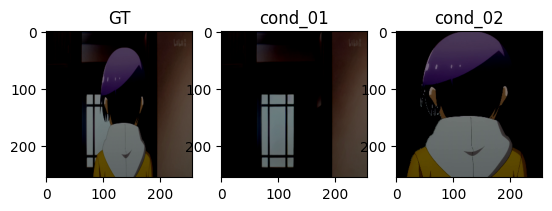

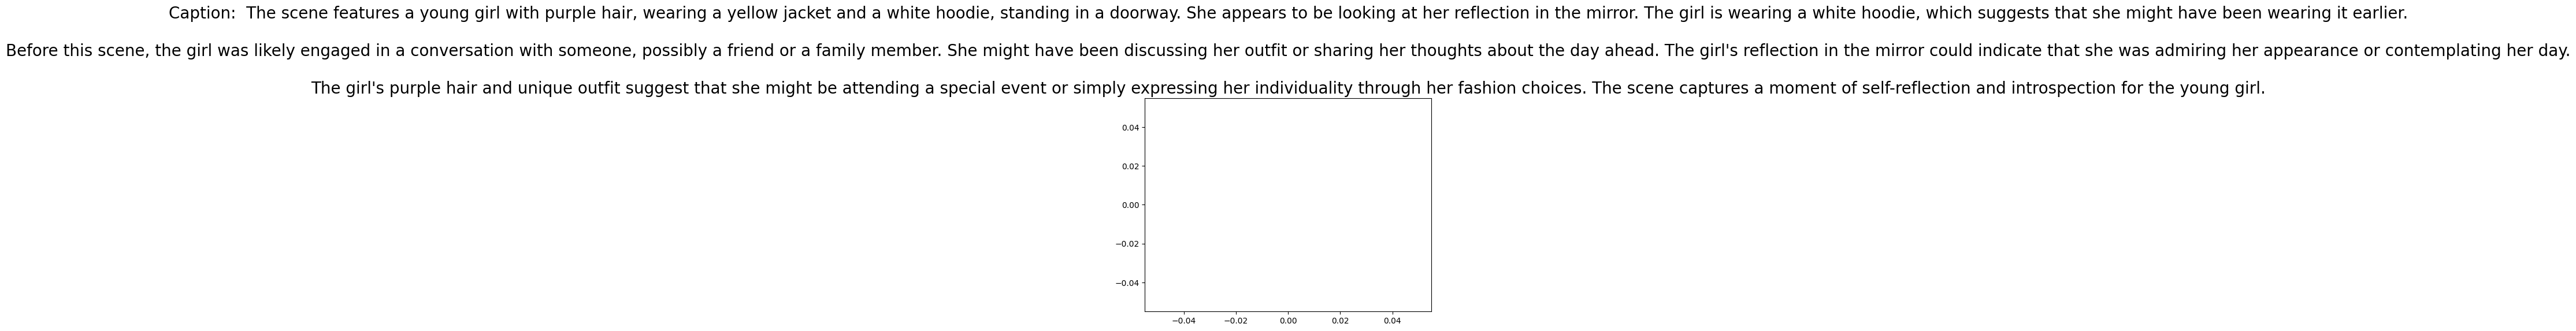

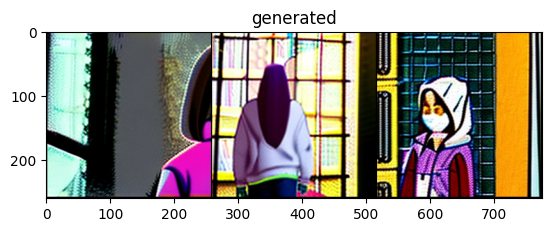

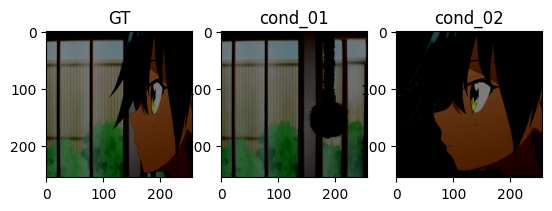

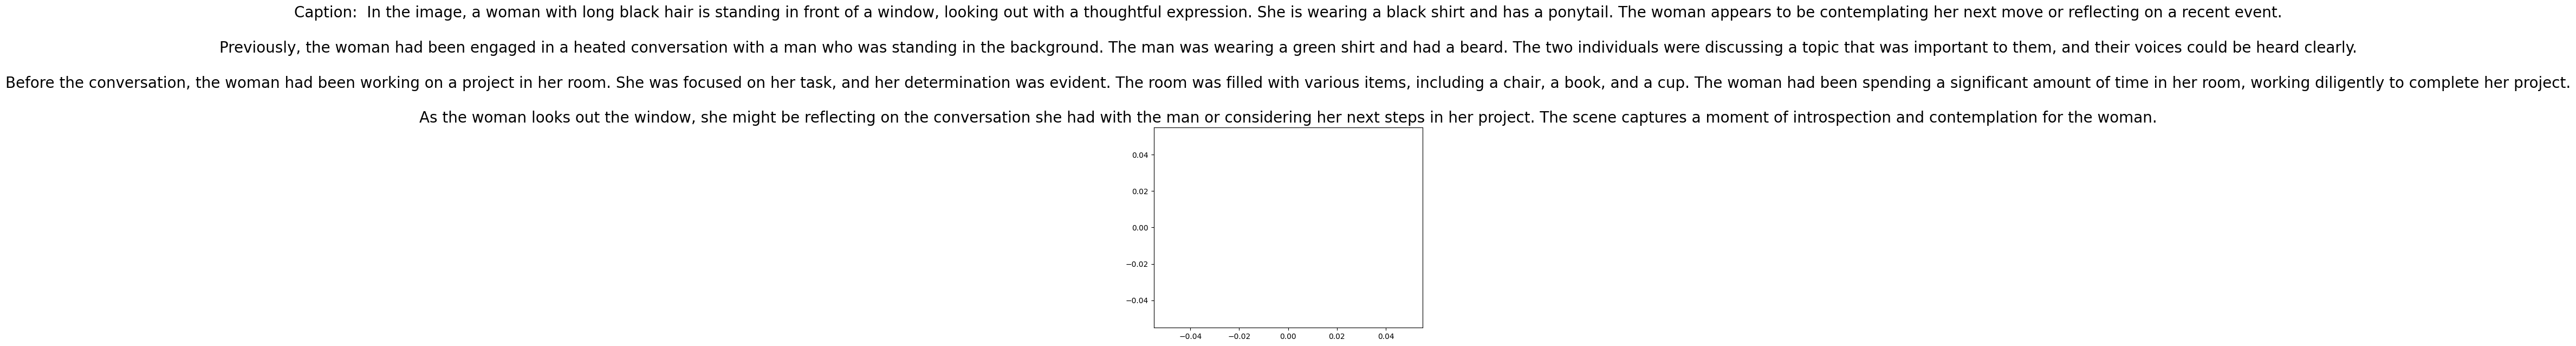

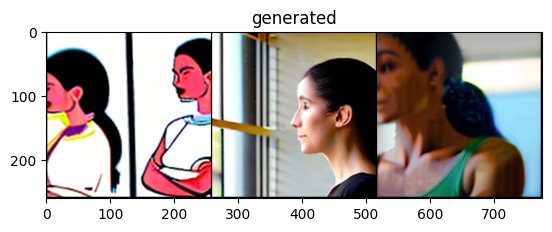

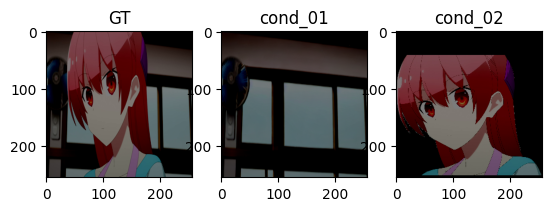

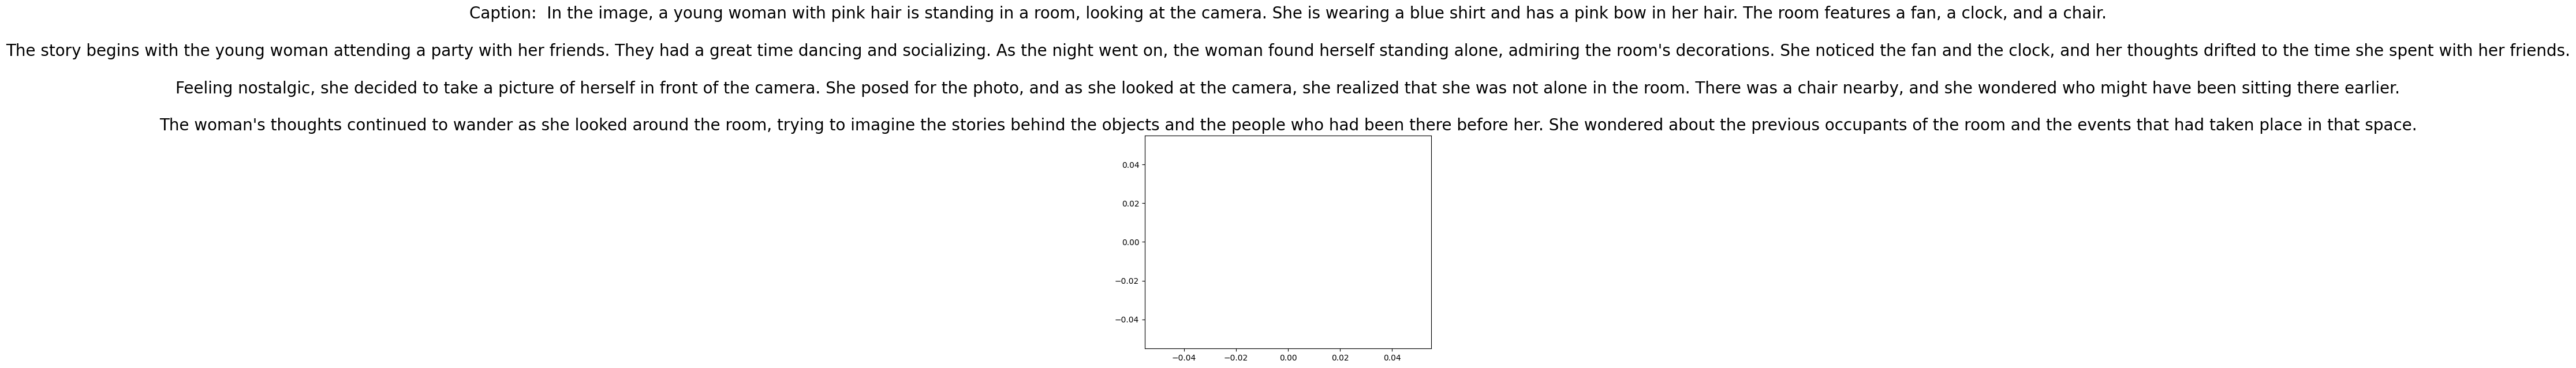

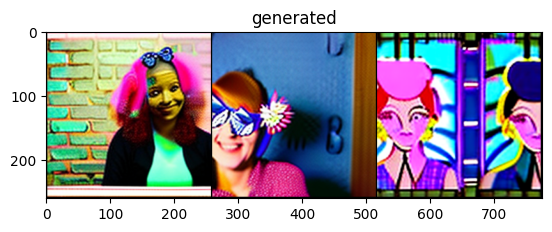

In [95]:
def training_loop(args, controlnet, optimizer, lr_scheduler, \
                  train_dataloader, eval_dataloader, \
                  vae, unet, text_encoder, tokenizer, noise_scheduler, \
                  weight_dtype, accelerator, \
                  logger, repo_id, num_update_steps_per_epoch
                  ):
    
    vae.requires_grad_(False)
    unet.requires_grad_(False)
    text_encoder.requires_grad_(False)
    
    vae.eval()
    text_encoder.eval()
    unet.eval()
    controlnet.train()


    # Train!
    total_batch_size = args.train_batch_size * accelerator.num_processes * args.gradient_accumulation_steps

    logger.info("***** Running training *****")
    logger.info(f"  Num examples = {len(train_dataloader.dataset)}")
    logger.info(f"  Num batches each epoch = {len(train_dataloader)}")
    logger.info(f"  Num Epochs = {args.num_train_epochs}")
    logger.info(f"  Instantaneous batch size per device = {args.train_batch_size}")
    logger.info(f"  Total train batch size (w. parallel, distributed & accumulation) = {total_batch_size}")
    logger.info(f"  Gradient Accumulation steps = {args.gradient_accumulation_steps}")
    logger.info(f"  Total optimization steps = {args.max_train_steps}")
    global_step = 0
    first_epoch = 0

    # Potentially load in the weights and states from a previous save
    if args.resume_from_checkpoint:
        if args.resume_from_checkpoint != "latest":
            path = os.path.basename(args.resume_from_checkpoint)
        else:
            # Get the most recent checkpoint
            dirs = os.listdir(args.output_dir)
            dirs = [d for d in dirs if d.startswith("checkpoint")]
            dirs = sorted(dirs, key=lambda x: int(x.split("-")[1]))
            path = dirs[-1] if len(dirs) > 0 else None

        if path is None:
            accelerator.print(
                f"Checkpoint '{args.resume_from_checkpoint}' does not exist. Starting a new training run."
            )
            args.resume_from_checkpoint = None
            initial_global_step = 0
        else:
            accelerator.print(f"Resuming from checkpoint {path}")
            accelerator.load_state(os.path.join(args.output_dir, path))
            global_step = int(path.split("-")[1])

            initial_global_step = global_step
            first_epoch = global_step // num_update_steps_per_epoch
    else:
        initial_global_step = 0

    progress_bar = tqdm(
        range(0, args.max_train_steps),
        initial=initial_global_step,
        desc="Steps",
        # Only show the progress bar once on each machine.
        disable=not accelerator.is_local_main_process,
    )

    image_logs = None
    for epoch in range(first_epoch, args.num_train_epochs):
        for step, batch in enumerate(train_dataloader):
            vae.eval()
            text_encoder.eval()
            unet.eval()
            controlnet.train()
            with accelerator.accumulate(controlnet):
                # Convert images to latent space
                # print(f"batch['pixel_values'].shape: {batch['pixel_values'].shape}")
                latents = vae.encode(batch["pixel_values"].to(dtype=weight_dtype)).latent_dist.sample()
                latents = latents * vae.config.scaling_factor

                # Sample noise that we'll add to the latents
                noise = torch.randn_like(latents)
                bsz = latents.shape[0]
                # Sample a random timestep for each image
                timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (bsz,), device=latents.device)
                timesteps = timesteps.long()

                # Add noise to the latents according to the noise magnitude at each timestep
                # (this is the forward diffusion process)
                noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

                # Get the text embedding for conditioning
                encoder_hidden_states = text_encoder(batch["input_ids"], return_dict=False)[0]

                controlnet_image_01 = batch["conditioning_pixel_values"].to(dtype=weight_dtype)
                controlnet_image_02 = batch["conditioning_pixel_values_02"].to(dtype=weight_dtype)

                # assert to be multi-controlnet
                assert isinstance(controlnet, MultiControlNetModel_SELF)
                down_block_res_samples, mid_block_res_sample = controlnet(
                    noisy_latents,
                    timesteps,
                    encoder_hidden_states=encoder_hidden_states,
                    controlnet_cond=[controlnet_image_01, controlnet_image_02],
                    return_dict=False,
                    conditioning_scale=[1.0]*2,
                )


                # down_block_res_samples_01, mid_block_res_sample_01 = controlnet(
                #     noisy_latents,
                #     timesteps,
                #     encoder_hidden_states=encoder_hidden_states,
                #     controlnet_cond=controlnet_image_01,
                #     return_dict=False,
                # )

                # down_block_res_samples_02, mid_block_res_sample_02 = controlnet(
                #     noisy_latents,
                #     timesteps,
                #     encoder_hidden_states=encoder_hidden_states,
                #     controlnet_cond=controlnet_image_02,
                #     return_dict=False,
                # )

                # ## Merging controlnet outputs
                # down_block_res_samples = [sample_01.to(dtype=weight_dtype) + sample_02.to(dtype=weight_dtype) \
                #                           for sample_01, sample_02 \
                #                           in zip(down_block_res_samples_01, down_block_res_samples_02)]
                # mid_block_res_sample = mid_block_res_sample_01.to(dtype=weight_dtype) + \
                #                        mid_block_res_sample_02.to(dtype=weight_dtype)

                # Predict the noise residual
                model_pred = unet(
                    noisy_latents,
                    timesteps,
                    encoder_hidden_states=encoder_hidden_states,
                    down_block_additional_residuals=[
                        sample.to(dtype=weight_dtype) for sample in down_block_res_samples
                    ],
                    mid_block_additional_residual=mid_block_res_sample.to(dtype=weight_dtype),
                    return_dict=False,
                )[0]

                # Get the target for loss depending on the prediction type
                if noise_scheduler.config.prediction_type == "epsilon":
                    target = noise
                elif noise_scheduler.config.prediction_type == "v_prediction":
                    target = noise_scheduler.get_velocity(latents, noise, timesteps)
                else:
                    raise ValueError(f"Unknown prediction type {noise_scheduler.config.prediction_type}")
                loss = F.mse_loss(model_pred.float(), target.float(), reduction="mean")

                accelerator.backward(loss)
                if accelerator.sync_gradients:
                    params_to_clip = controlnet.parameters()
                    accelerator.clip_grad_norm_(params_to_clip, args.max_grad_norm)
                optimizer.step()
                lr_scheduler.step()
                optimizer.zero_grad(set_to_none=args.set_grads_to_none)

            # Checks if the accelerator has performed an optimization step behind the scenes
            if accelerator.sync_gradients:
                progress_bar.update(1)
                global_step += 1

                if accelerator.is_main_process:
                    if global_step % args.checkpointing_steps == 0:
                        # _before_ saving state, check if this save would set us over the `checkpoints_total_limit`
                        if args.checkpoints_total_limit is not None:
                            checkpoints = os.listdir(args.output_dir)
                            checkpoints = [d for d in checkpoints if d.startswith("checkpoint")]
                            checkpoints = sorted(checkpoints, key=lambda x: int(x.split("-")[1]))

                            # before we save the new checkpoint, we need to have at _most_ `checkpoints_total_limit - 1` checkpoints
                            if len(checkpoints) >= args.checkpoints_total_limit:
                                num_to_remove = len(checkpoints) - args.checkpoints_total_limit + 1
                                removing_checkpoints = checkpoints[0:num_to_remove]

                                logger.info(
                                    f"{len(checkpoints)} checkpoints already exist, removing {len(removing_checkpoints)} checkpoints"
                                )
                                logger.info(f"removing checkpoints: {', '.join(removing_checkpoints)}")

                                for removing_checkpoint in removing_checkpoints:
                                    removing_checkpoint = os.path.join(args.output_dir, removing_checkpoint)
                                    shutil.rmtree(removing_checkpoint)

                        save_path = os.path.join(args.output_dir, f"checkpoint-{global_step}")
                        accelerator.save_state(save_path)
                        logger.info(f"Saved state to {save_path}")

                    # if args.validation_prompt is not None and global_step % args.validation_steps == 0:
                    if global_step % args.validation_steps == 0:
                        image_logs = log_validation(
                            eval_dataloader,
                            vae,
                            text_encoder,
                            tokenizer,
                            unet,
                            controlnet,
                            args,
                            accelerator,
                            weight_dtype,
                            global_step,
                        )

            logs = {"loss": loss.detach().item(), "lr": lr_scheduler.get_last_lr()[0]}
            progress_bar.set_postfix(**logs)
            accelerator.log(logs, step=global_step)

            if global_step >= args.max_train_steps:
                break

    # Create the pipeline using using the trained modules and save it.
    accelerator.wait_for_everyone()
    if accelerator.is_main_process:
        controlnet = unwrap_model(controlnet, accelerator)
        controlnet.save_pretrained(args.output_dir)

        # Run a final round of validation.
        image_logs = None
        if args.validation_prompt is not None:
            image_logs = log_validation(\
                eval_dataloader=eval_dataloader,
                vae=vae,
                text_encoder=text_encoder,
                tokenizer=tokenizer,
                unet=unet,
                controlnet=controlnet,
                args=args,
                accelerator=accelerator,
                weight_dtype=weight_dtype,
                step=global_step,
                is_final_validation=True,
            )

        if args.push_to_hub:
            save_model_card(
                repo_id,
                image_logs=image_logs,
                base_model=args.pretrained_model_name_or_path,
                repo_folder=args.output_dir,
            )
            upload_folder(
                repo_id=repo_id,
                folder_path=args.output_dir,
                commit_message="End of training",
                ignore_patterns=["step_*", "epoch_*"],
            )

    accelerator.end_training()


if __name__ == "__main__":
    # args = parse_args(args_list)
    # training_loop(args)
    training_loop(args, controlnet, optimizer, lr_scheduler, \
                  train_dataloader, eval_dataloader, \
                  vae, unet, text_encoder, tokenizer, noise_scheduler, \
                  weight_dtype, accelerator, \
                  logger, repo_id, num_update_steps_per_epoch
                  )